## ML | Random-Sample-Imputation - Numerical Data

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Check missing (null) value

In [26]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

## Create X & Y

In [31]:
x = df.drop(columns=['Survived'])

In [33]:
y=df['Survived']

## Apply Train Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


## New Column Create in Both Train & Test

In [41]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']


In [45]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [47]:
x_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [49]:
x_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [51]:
x_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


## Replace Value Age_Imputed

In [71]:
x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna().sample(x_train['Age_imputed'].isnull().sum(), random_state=0).values
)

x_test.loc[x_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna().sample(x_test['Age_imputed'].isnull().sum(), random_state=0).values
)

## Review Sample Random Generate Value

In [73]:
x_train['Age'].dropna().sample(1).values

array([24.])

In [75]:
x_train['Age'].isnull().sum()

148

In [97]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([45.  , 19.  , 25.  , 40.  , 23.  , 24.  , 48.  , 38.  , 30.  ,
       38.  ,  4.  , 30.  , 25.  , 29.  , 20.  , 48.  , 40.5 , 29.  ,
        0.75, 41.  , 16.  , 43.  , 60.  , 44.  , 28.  , 62.  , 18.  ,
        0.83, 14.5 , 27.  , 20.  , 29.  , 22.  , 11.  , 35.  , 43.  ,
       34.  , 21.  , 29.  , 31.  , 25.  , 36.5 , 33.  , 32.  , 61.  ,
       29.  , 41.  , 17.  , 39.  , 35.  , 32.  ,  3.  , 36.  , 18.  ,
       39.  , 36.  , 34.  , 30.  , 45.  , 18.  , 26.  , 40.5 , 11.  ,
       36.  , 34.  , 33.  , 36.  , 45.  , 36.  , 48.  , 62.  , 33.  ,
       24.  , 46.  , 51.  , 45.  , 18.  ,  4.  , 19.  , 25.  , 28.  ,
        5.  , 35.  , 33.  , 56.  , 37.  , 40.  , 39.  , 71.  , 32.5 ,
        8.  , 19.  ,  1.  , 24.  , 32.  , 37.  , 45.  , 38.  , 28.5 ,
        2.  , 29.  , 63.  ,  2.  , 25.  , 18.  ,  8.  , 16.  , 12.  ,
       65.  , 53.  ,  3.  , 52.  , 47.  , 26.  ,  6.  , 16.  , 21.  ,
       23.  , 16.  , 56.  , 31.  , 35.  , 31.  , 30.  , 27.  , 30.  ,
       16.  , 16.  ,

In [99]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,4.0
493,71.0,49.5042,71.0
527,NaN,221.7792,33.0


## Compare Original Age & Imputed Age

C:\Users\Naisarg\AppData\Local\Temp\ipykernel_19276\3070442571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\Naisarg\AppData\Local\Temp\ipykernel_19276\3070442571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_tr

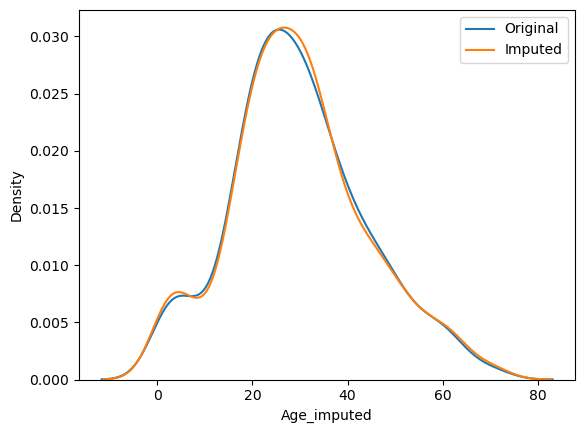

In [102]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

## Compare Variable Variance

In [105]:
print('Original Variable Variance:',x_train['Age'].var())
print('Variance After random imputation:',x_train['Age_imputed'].var())

Original Variable Variance: 204.3495133904614
Variance After random imputation: 208.85108099685564
